In [18]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [19]:
a_renomear = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [20]:
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [25]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

SEED = 5
np.random.seed(SEED)
# Dividindo os dados em treino e teste
train_x, test_x, train_y, test_y = train_test_split(x, y ,test_size=0.3, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


model = SVC(gamma='auto')
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)

Treinaremos com 1509 elementos e testaremos com 648 elementos
A acurácia foi 67.44%


In [27]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max, y_min, y_max)

pixels = 100
eixoX = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixoY = np.arange(y_min, y_max, (y_max - y_min)/pixels)


xx, yy = np.meshgrid(eixoX, eixoY)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

z= model.predict(pontos)
z= z.reshape(xx.shape)
z

-1.735589272849122 1.7530334372529093 -0.5929094908102506 5.429458603479308


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

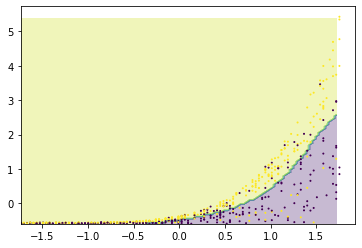

In [29]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)
